In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
from sklearn import linear_model
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()
# названия переменных
#print(iris.feature_names)
# данные
#print(iris.data[:5])
# целевая переменная
#print(iris.target_names)
#print(iris.target)


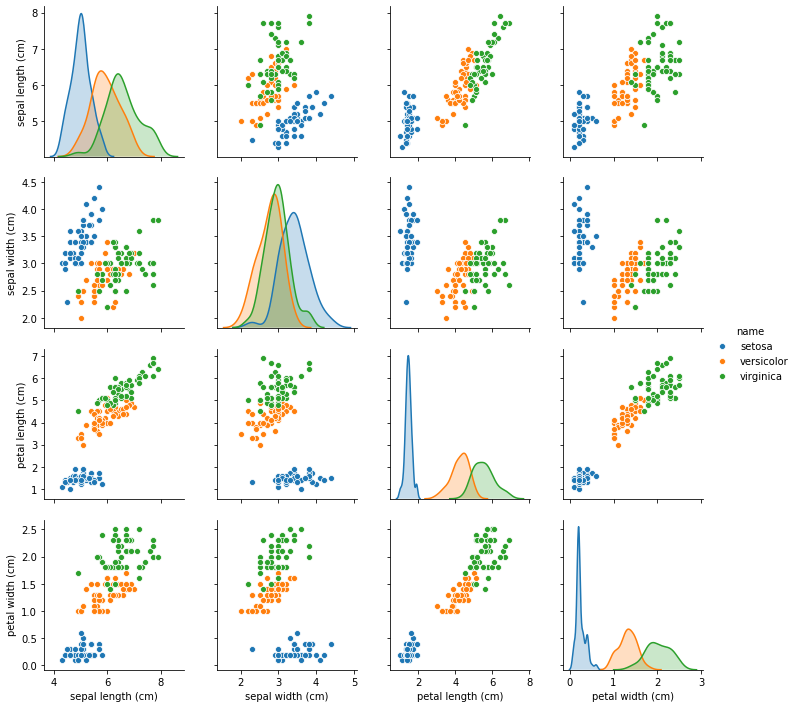

In [3]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
#iris_frame[:5]
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [4]:
A = iris_frame.iloc[:,:4]
#A
U, s, W = np.linalg.svd(A)
# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица U размер:{shape(U)} :\n{U}')
print(f'Матрица Sigma размер:{shape(Sigma)} :\n{Sigma}')
print(f'Матрица V размер:{shape(V)} :\n{V}')

Матрица U размер:(150, 150) :
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]
Матрица Sigma размер:(150, 4) :
[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         

In [12]:
n_elements = 2
Sigma = Sigma[:, :n_elements]

V = V[:,:n_elements]
# reconstruct
B = U.dot(Sigma.dot(V.T))
print(A)
print(B)

U, s, W = np.linalg.svd(B)
# Транспонируем матрицу W
V = W.T


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

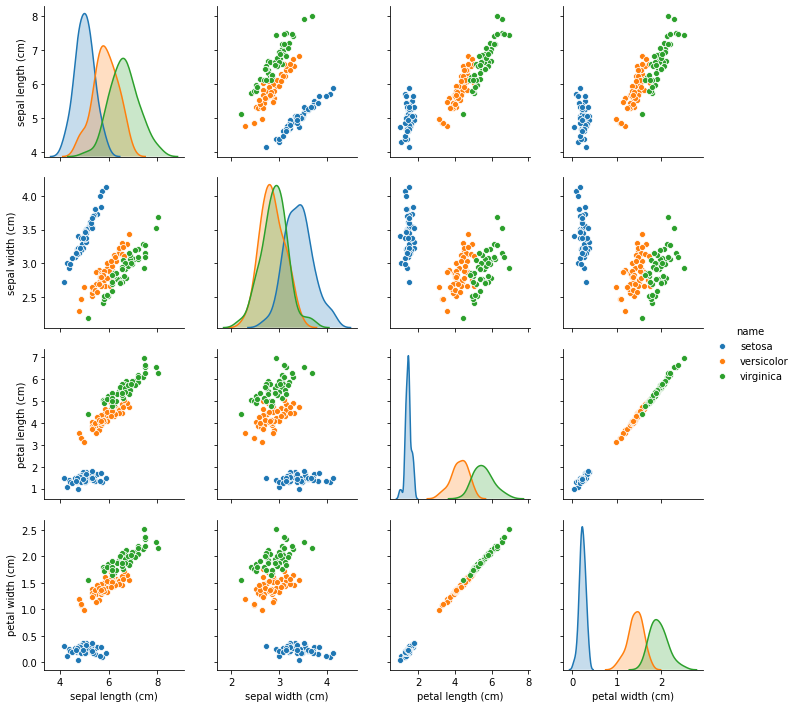

In [6]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(B)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
#iris_frame[:5]
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [7]:
B_covr = np.array([[B.T[0].dot(B.T[0]), B.T[0].dot(B.T[1]), B.T[0].dot(B.T[2]), B.T[0].dot(B.T[3])],
                   [B.T[1].dot(B.T[0]), B.T[1].dot(B.T[1]), B.T[1].dot(B.T[2]), B.T[1].dot(B.T[3])],
                   [B.T[2].dot(B.T[0]), B.T[2].dot(B.T[1]), B.T[2].dot(B.T[2]), B.T[2].dot(B.T[3])],
                   [B.T[3].dot(B.T[0]), B.T[3].dot(B.T[1]), B.T[3].dot(B.T[2]), B.T[3].dot(B.T[3])]])
print(f'Ковариационная матрица:\n{B_covr}')
U_b, s_b, VT_b = np.linalg.svd(B_covr)
print(f'Собственные значения:\n{s_b}')
print(f'Собственные векторы:\n{U_b}')

#Встроенная Функция
B_covr2 = np.cov(B.T)
print(f'Ковариационная матрица:\n{B_covr2}')
U2_b, s2_b, VT2_b = np.linalg.svd(B_covr2)
print(f'Собственные значения:\n{s2_b}')
print(f'Собственные векторы:\n{U2_b}')

Ковариационная матрица:
[[5220.46398741 2677.85305589 3484.66378717 1130.51314237]
 [2677.85305589 1424.58099772 1673.2796227   528.39397772]
 [3484.66378717 1673.2796227  2581.84701401  870.01352608]
 [1130.51314237  528.39397772  870.01352608  296.86738775]]
Собственные значения:
[9.20830507e+03 3.15454317e+02 7.00040302e-13 7.95812151e-14]
Собственные векторы:
[[-0.75110816 -0.2841749   0.56126166 -0.20016619]
 [-0.38008617 -0.5467445  -0.66453354  0.33911669]
 [-0.51300886  0.70866455 -0.41613333 -0.24789012]
 [-0.16790754  0.34367081  0.26497846  0.88514623]]
Ковариационная матрица:
[[ 0.68222377 -0.0208085   1.28603382  0.52241054]
 [-0.0208085   0.13721124 -0.34521301 -0.15395272]
 [ 1.28603382 -0.34521301  3.10979132  1.2939947 ]
 [ 0.52241054 -0.15395272  1.2939947   0.53951014]]
Собственные значения:
[4.22815554e+00 2.40580934e-01 3.97016438e-16 4.78980722e-17]
Собственные векторы:
[[-0.36356257 -0.71605943  0.12674128  0.58225235]
 [ 0.08751286 -0.66010344 -0.25134302 -0.702

In [13]:
C = VT_b.dot(B.T).T
C2 = W.dot(B.T).T
C3 = VT2_b.dot(B.T).T
print(f'Матрица признаков C в новом базисе:\n{C}')
print(f'Матрица признаков C2 в новом базисе:\n{C2}')
print(f'Матрица признаков C3 в новом базисе:\n{C3}')

Матрица признаков C в новом базисе:
[[-5.91274714e+00 -2.30203322e+00 -1.96050481e-15  1.27419778e-15]
 [-5.57248242e+00 -1.97182599e+00 -1.51842865e-15  1.40135724e-15]
 [-5.44697714e+00 -2.09520636e+00 -1.41807035e-15  1.17473863e-15]
 [-5.43645948e+00 -1.87038151e+00 -1.54341140e-15  1.16561118e-15]
 [-5.87564494e+00 -2.32829018e+00 -1.63998642e-15  1.51164064e-15]
 [-6.47759822e+00 -2.32464996e+00 -1.85486964e-15  1.38165092e-15]
 [-5.51597520e+00 -2.07090423e+00 -1.09997992e-15  1.28957926e-15]
 [-5.85092859e+00 -2.14807482e+00 -1.29846526e-15  1.38136674e-15]
 [-5.15891972e+00 -1.77506408e+00 -1.20271471e-15  1.10394942e-15]
 [-5.64500117e+00 -1.99000106e+00 -1.49083667e-15  1.18568796e-15]
 [-6.26539771e+00 -2.42576813e+00 -1.42264566e-15  1.66006671e-15]
 [-5.75200785e+00 -2.02037338e+00 -1.81309280e-15  1.08790047e-15]
 [-5.48058085e+00 -1.97777558e+00 -1.69577529e-15  1.07680521e-15]
 [-4.95112411e+00 -2.04828749e+00 -1.35852119e-15  1.29929279e-15]
 [-6.52596417e+00 -2.91606

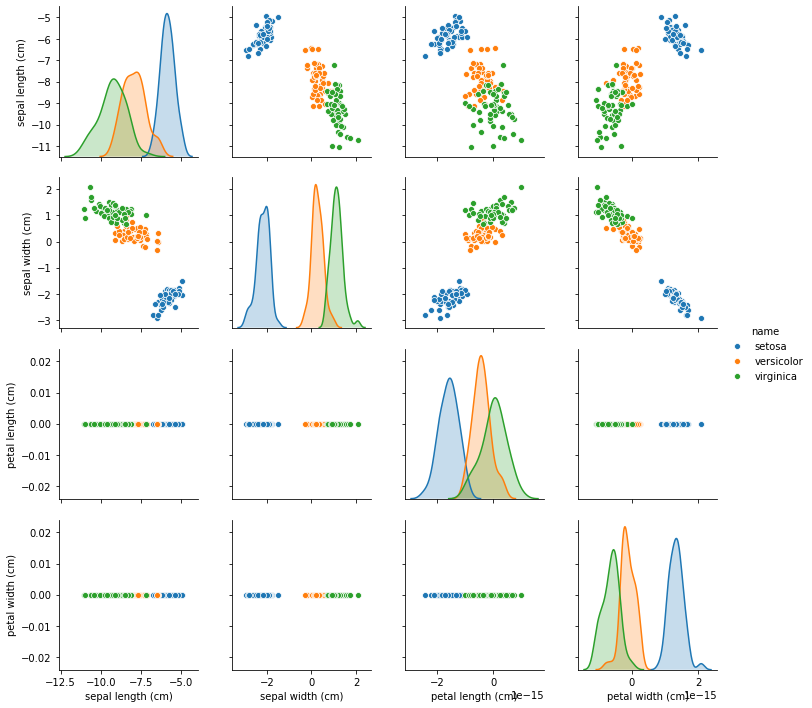

In [9]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
#iris_frame[:5]
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')


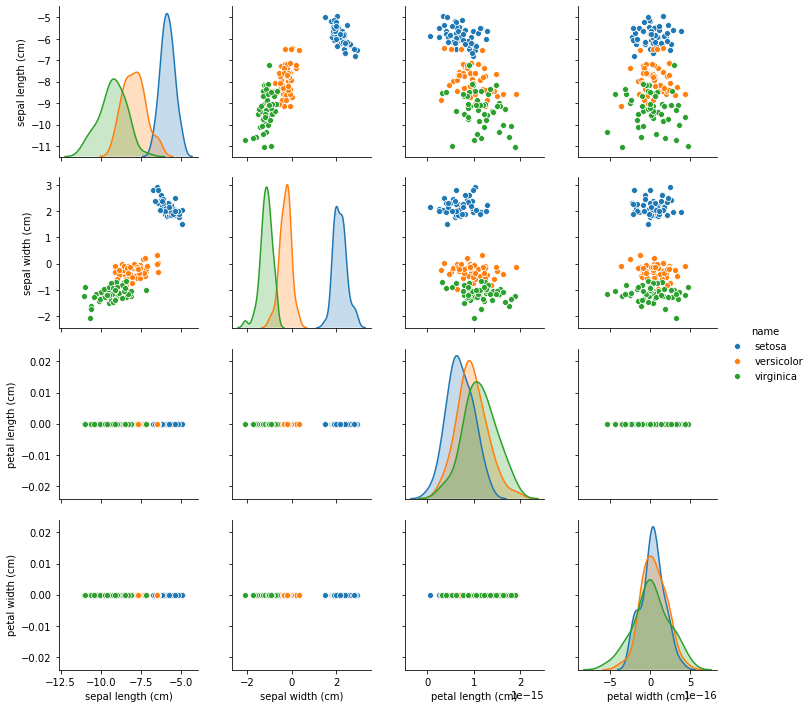

In [14]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C2)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
#iris_frame[:5]
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')


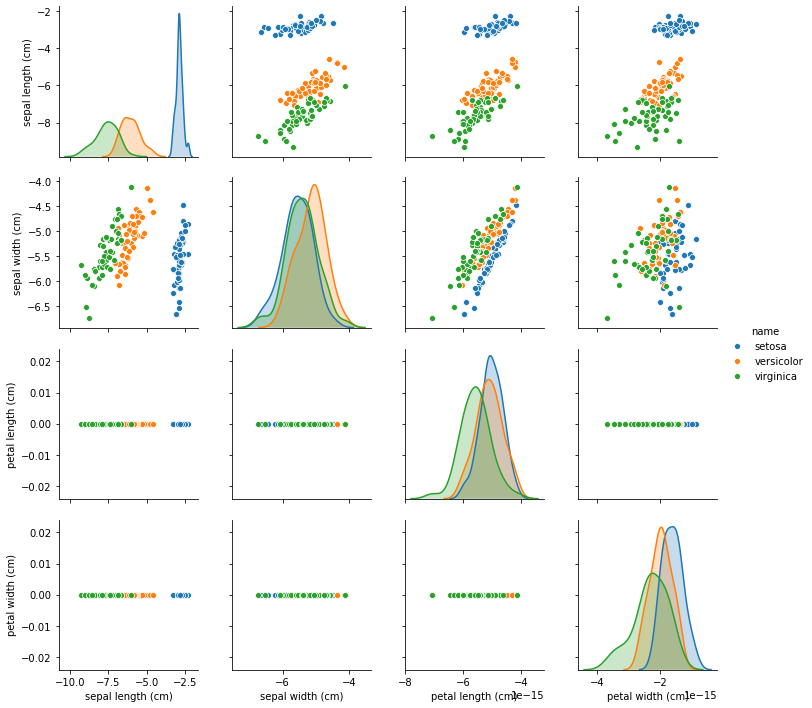

In [11]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C3)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
#iris_frame[:5]
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')